In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [2]:
df = pd.read_csv("/content/Cellular Network Analysis(in).csv")

print("Dataset overview:")
print(df.head())

df = df.drop(["Timestamp", "Signal Quality (%)"], axis=1)

X = df[['Latitude',
      'Longitude',
      'Data Throughput (Mbps)',
      'Latency (ms)',
      'BB60C Measurement (dBm)',
      'srsRAN Measurement (dBm)',
      'BladeRFxA9 Measurement (dBm)']]

Y = df["Signal Strength (dBm)"]

print("\nFeatures used:")
print(X.columns.tolist())
print(f"\nTarget variable: Signal Strength (dBm)")

Dataset overview:
                    Timestamp           Locality   Latitude  Longitude  \
0  2023-05-05 12:50:40.000000           Anisabad  25.599109  85.137355   
1  2023-05-05 12:53:47.210173        Fraser Road  25.433286  85.070053   
2  2023-05-05 12:56:54.420346  Boring Canal Road  25.498809  85.211371   
3  2023-05-05 13:00:01.630519            Danapur  25.735138  85.208400   
4  2023-05-05 13:03:08.840692    Phulwari Sharif  25.538556  85.159860   

   Signal Strength (dBm)  Signal Quality (%)  Data Throughput (Mbps)  \
0             -84.274113                 0.0                1.863890   
1             -97.653121                 0.0                5.132296   
2             -87.046134                 0.0                1.176985   
3             -94.143159                 0.0               68.596932   
4             -94.564765                 0.0               38.292038   

   Latency (ms) Network Type  BB60C Measurement (dBm)  \
0    129.122914           3G                 0.

In [3]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

=x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {x_train.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")



Training set size: 13463 samples
Test set size: 3366 samples


In [4]:

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("\nRandom Forest model evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")



Random Forest model evaluation:
R² Score: 0.8865
MSE: 3.2072
RMSE: 1.7909


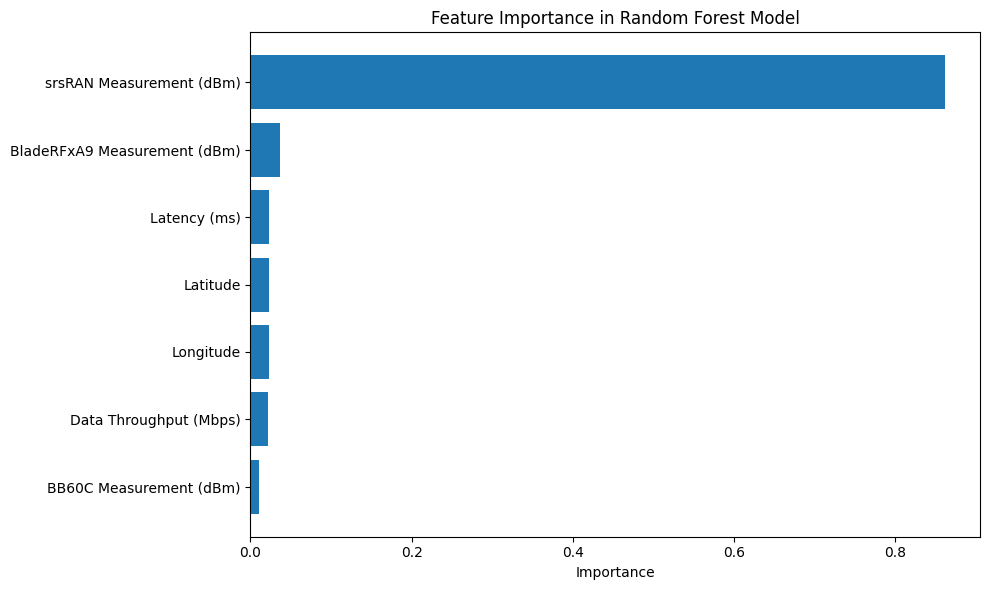

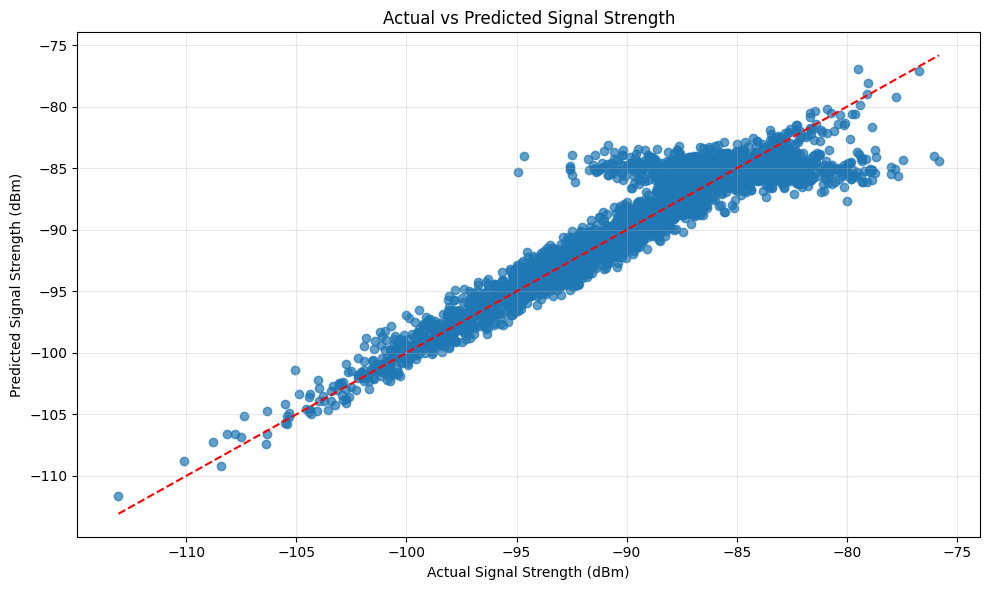


Detailed predictions on test set (first 10 samples):
      Actual  Predicted  Absolute Error
0 -88.480745 -88.949324        0.468579
1 -91.032814 -91.302574        0.269760
2 -85.620351 -84.097420        1.522931
3 -82.582479 -83.720640        1.138161
4 -85.654623 -84.516024        1.138599
5 -93.155617 -93.856859        0.701242
6 -88.508565 -88.247104        0.261461
7 -84.967575 -83.815986        1.151589
8 -87.071667 -88.407502        1.335835
9 -98.695672 -99.095344        0.399672

Mean Absolute Error: 1.2184
Max Absolute Error: 10.6880


In [5]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Signal Strength (dBm)')
plt.ylabel('Predicted Signal Strength (dBm)')
plt.title('Actual vs Predicted Signal Strength')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDetailed predictions on test set (first 10 samples):")
results_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True),
                           'Predicted': y_pred,
                           'Absolute Error': abs(y_test.reset_index(drop=True) - y_pred)})
print(results_df.head(10))

print(f"\nMean Absolute Error: {results_df['Absolute Error'].mean():.4f}")
print(f"Max Absolute Error: {results_df['Absolute Error'].max():.4f}")